In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [2]:
def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Resize the image to a fixed size (optional)
    img = cv2.resize(img, (800, 600))

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to remove noise
    blur = cv2.GaussianBlur(gray, (3, 3), 0)

    return blur

In [3]:
img1=preprocess_image('/content/1.png')
img2=preprocess_image('/content/2.png')
img3=preprocess_image('/content/3.png')
img4=preprocess_image('/content/4.png')
img5=preprocess_image('/content/5.png')
img6=preprocess_image('/content/6.png')
img7=preprocess_image('/content/7.png')
img8=preprocess_image('/content/8.png')
img9=preprocess_image('/content/9.png')
img10=preprocess_image('/content/10.png')
img11=preprocess_image('/content/11.png')
img12=preprocess_image('/content/12.png')

In [4]:
templates = [img1,img2,img3,img4,img5,img6,img7,img8,img9,img10,img11,img12]


In [5]:
sift = cv2.SIFT_create()
bf = cv2.BFMatcher()

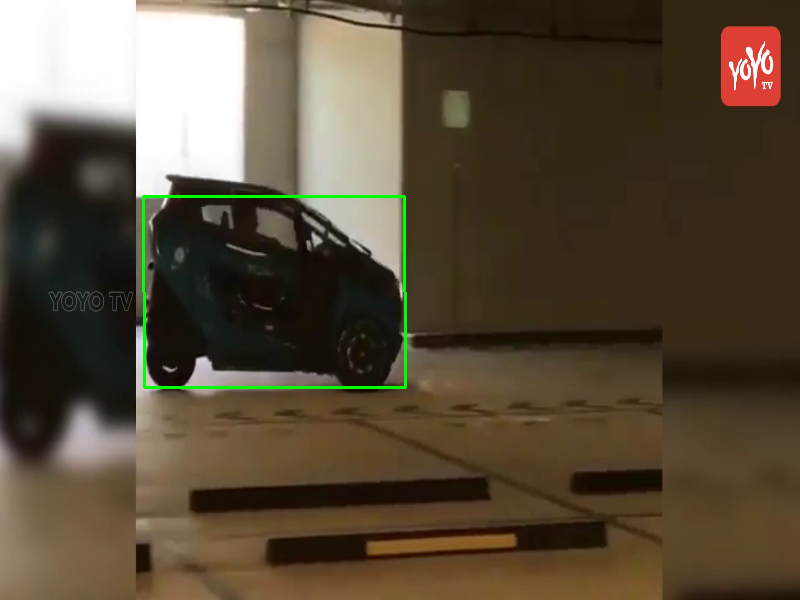

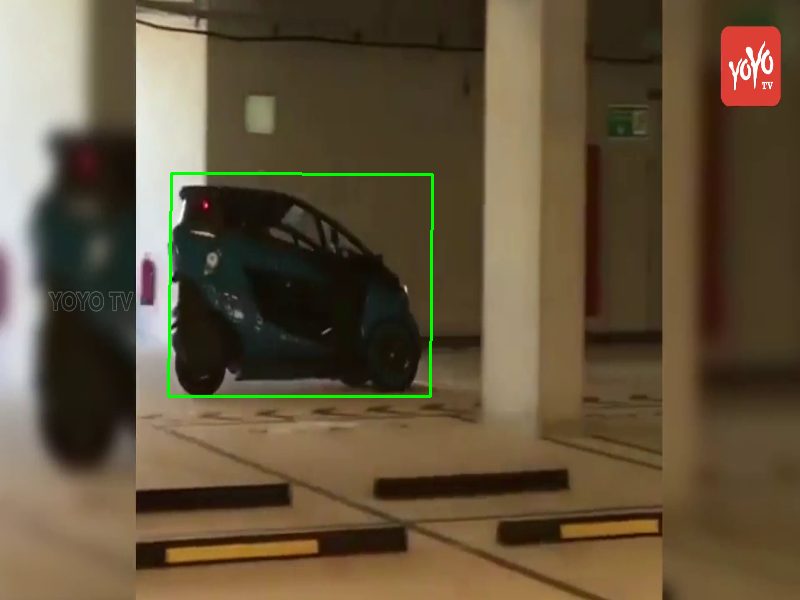

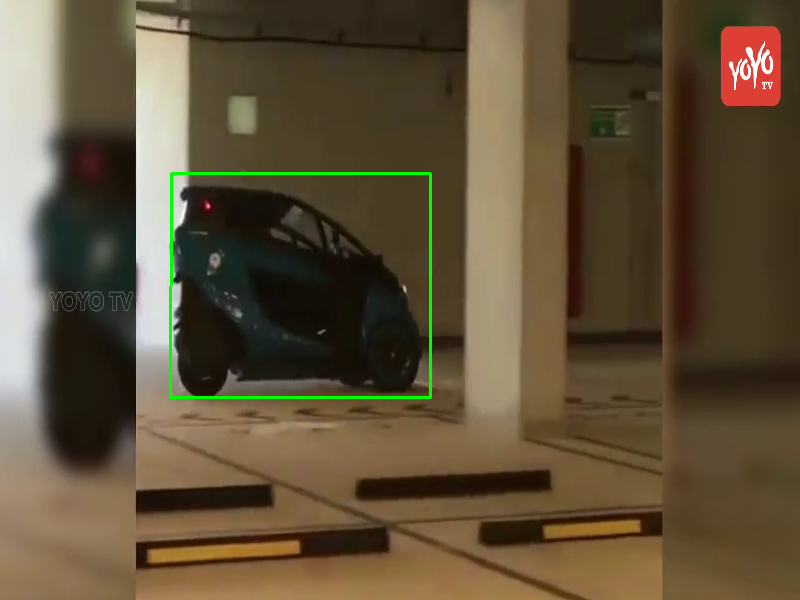

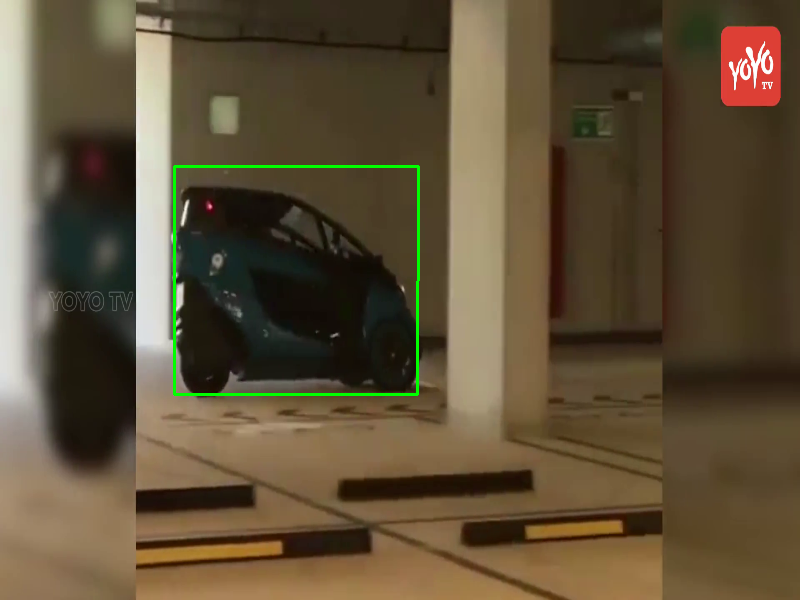

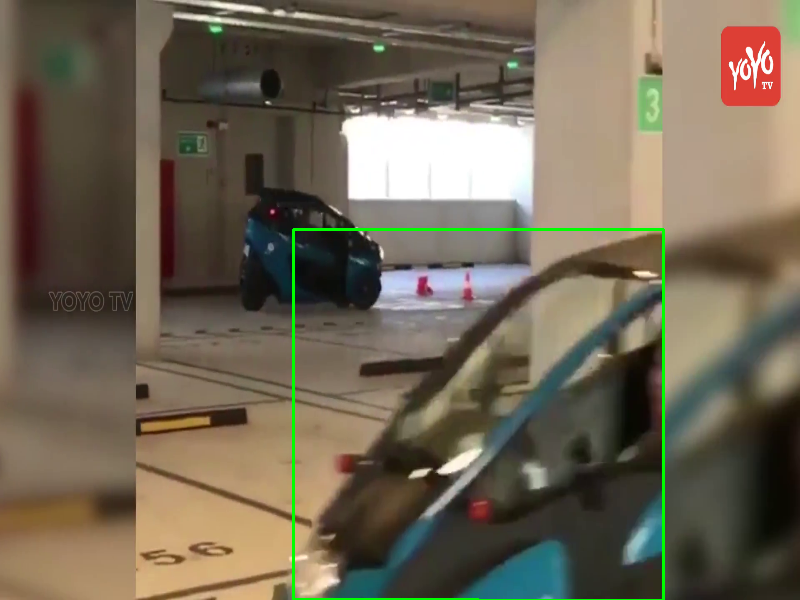

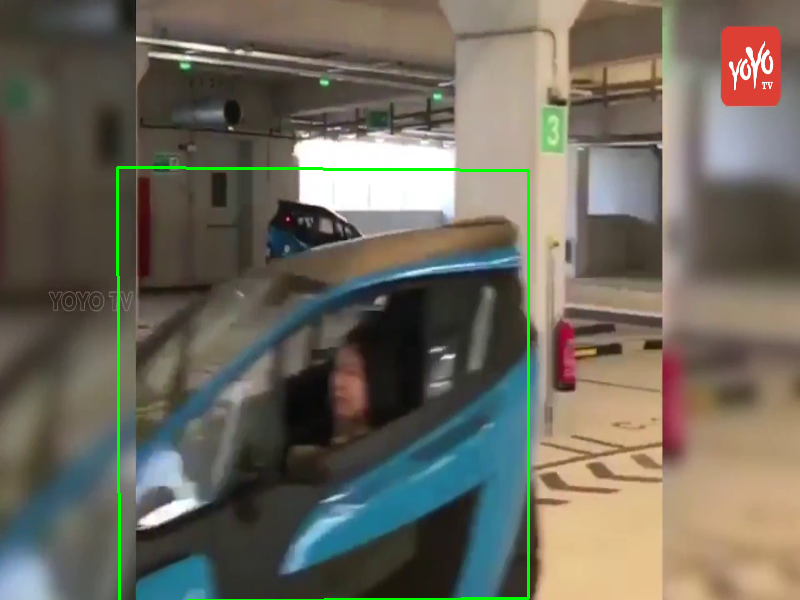

In [ ]:
vid = cv2.VideoCapture('/content/car.mp4')

while True:
    ret, frame = vid.read()
    
    if not ret:
        vid = cv2.VideoCapture('/content/car.mp4')
        continue

    frame = cv2.resize(frame, (800, 600))    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3, 3), 0)
    
    for template in templates:
        keypoints_template, descriptors_template = sift.detectAndCompute(template, None)
        keypoints_frame, descriptors_frame = sift.detectAndCompute(blur, None) 
        matches = bf.knnMatch(descriptors_template, descriptors_frame, k=2)
    
        good_matches = []
    
        for m, n in matches:
            if m.distance < 0.8 * n.distance:
                good_matches.append(m)
            
        if len(good_matches) >= 50:

            src_pts = np.float32([keypoints_template[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2) 
            dst_pts = np.float32([keypoints_frame[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

            M,_=cv2.findHomography(src_pts, dst_pts, cv2.RANSAC)

            h, w = template.shape

            template_corner = np.float32([[0, 0], [0, h], [w, h], [w, 0]]).reshape(-1, 1, 2)
            transformed_corner = cv2.perspectiveTransform(template_corner, M)

            bounding_box = cv2.polylines(frame, [np.int32(transformed_corner)], True, (0, 255, 0), 2)
            cv2_imshow( bounding_box)
            
    
    if cv2.waitKey(1)==27:
        break
vid.release()
cv2.destroyAllWindows()